<a href="https://colab.research.google.com/github/Bosy-Ayman/IR_Project/blob/main/IR_Project_search_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install the Pyterrier framework
!pip install python-terrier
# install the nltk modules
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.2/335.2 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.

In [2]:
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.8 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8



In [3]:
#Import the necessary modules:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import *
from nltk.stem.porter import *
import pandas as pd
import re # used to clean the data
#to display the full text on the notebook without truncation
pd.set_option('display.max_colwidth', 150)

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Data** **collection**
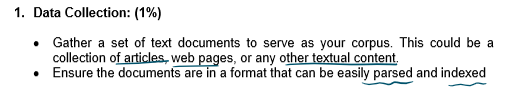

In [7]:
df = pd.read_csv('/content/Corona_NLP_test.csv')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #cor...",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns...",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco O...,Neutral


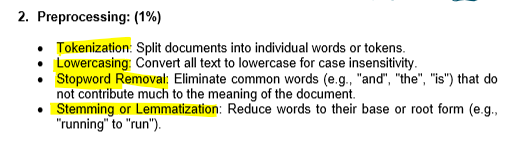

In [5]:
# Initialize Porter stemmer
stemmer = PorterStemmer()

In [6]:
def Stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # print (tokens)
    return ' '.join(stemmed_tokens)

def clean(text):
   text = re.sub(r"[\.\,\#_\|\:\?\?\/\=\@]", " ", text) # remove special characters
   text = re.sub(r'\t', ' ', text) # remove tabs
   text = re.sub(r'\n', ' ', text) # remove line jump
   text = re.sub(r"\s+", " ", text) # remove extra white space
   text = text.strip()
   return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words] #Lower is used to normalize al the words make them in lower case
    # print('Tokens are:',tokens,'\n')
    return ' '.join(filtered_tokens)

#we need to process the query also as we did for documents
def preprocess(sentence):
  sentence = clean(sentence)
  sentence = remove_stopwords(sentence)
  sentence = Stem_text(sentence)
  return sentence

In [9]:
res = df['OriginalTweet'].apply(preprocess)
res

0       trend new yorker encount empti supermarket shelv ( pictur wegman brooklyn ) sold-out onlin grocer ( foodkick maxdeliveri ) coronavirus-fear shoppe...
1                          could n't find hand sanit fred meyer turn amazon $ 114 97 2 pack purel ! ! check coronaviru concern drive price http co ygbipbflmi
2                                                                                                                            find protect love one coronaviru
3       panic buy hit newyork citi anxiou shopper stock food & amp ; medic suppli healthcar worker 30 becom bigappl 1st confirm coronaviru patient bloombe...
4       toiletpap dunnypap coronaviru coronavirusaustralia coronavirusupd covid 19 9new corvid19 7newsmelb dunnypaperg costco one week everyon buy babi mi...
                                                                                ...                                                                          
3793                                                

# Indexing
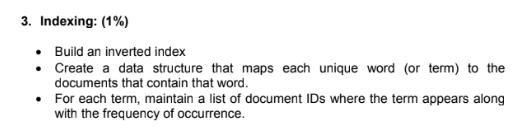

In [13]:
df['docno'] = df["ScreenName"].astype(str)
pd_indexer = pt.DFIndexer("./pd_index1")
indexref = pd_indexer.index(df["OriginalTweet"], df["docno"])

In [14]:
index = pt.IndexFactory.of(indexref)

In [15]:
word_to_documents = {}

inv = index.getInvertedIndex()
meta = index.getMetaIndex()

for kv in index.getLexicon():
    term = kv.getKey()
    pointer = index.getLexicon()[term]
    doc_ids = []
    for posting in inv.getPostings(pointer):
        docno = meta.getItem("docno", posting.getId())
        doc_ids.append(docno)

    word_to_documents[term] = doc_ids

for term, doc_ids in word_to_documents.items():
    print("%s -> %s (%d occurrences)" % (term, doc_ids, len(doc_ids)))

Streaming output truncated to the last 5000 lines.
live -> ['44961', '44972', '44988', '45073', '45102', '45127', '45152', '45161', '45180', '45209', '45224', '45311', '45319', '45394', '45403', '45519', '45525', '45641', '45642', '45648', '45657', '45670', '45681', '45703', '45727', '45737', '45741', '45760', '45784', '45802', '45805', '45899', '45939', '45955', '46138', '46152', '46207', '46247', '46257', '46379', '46424', '46442', '46449', '46515', '46541', '46574', '46576', '46687', '46692', '46716', '46835', '46913', '46933', '46953', '46957', '46976', '46979', '47011', '47071', '47135', '47160', '47169', '47179', '47193', '47218', '47257', '47308', '47311', '47372', '47437', '47471', '47560', '47584', '47706', '47729', '47785', '47828', '47830', '47841', '47882', '47916', '47921', '47969', '48018', '48080', '48122', '48165', '48173', '48182', '48218', '48371', '48405', '48439', '48455', '48482', '48536', '48674'] (97 occurrences)
liveabl -> ['47106'] (1 occurrences)
livelihood ->

# Query Processing
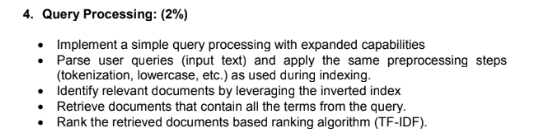

In [21]:
# Define the query
query = "Trending news"

# Preprocess the query
preprocessed_query = preprocess(query)

# Search the index for relevant documents
searcher = pt.BatchRetrieve(index, wmodel="BM25")
results = searcher(preprocessed_query)

# Extract relevant document IDs from the search results
relevant_docs = [result['docno'] for result in results]

print(relevant_docs)

KeyError: 'qid'

# Query Expansion
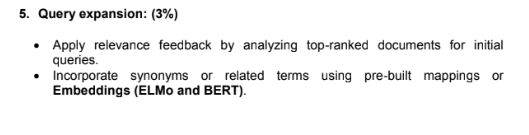